In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=UserWarning)
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, PrecisionRecallDisplay, RocCurveDisplay

In [2]:
df = pd.read_csv("data/kidney_disease.csv")
print(df)
df.info()

      id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes  yes   no  good   no   no   
1    

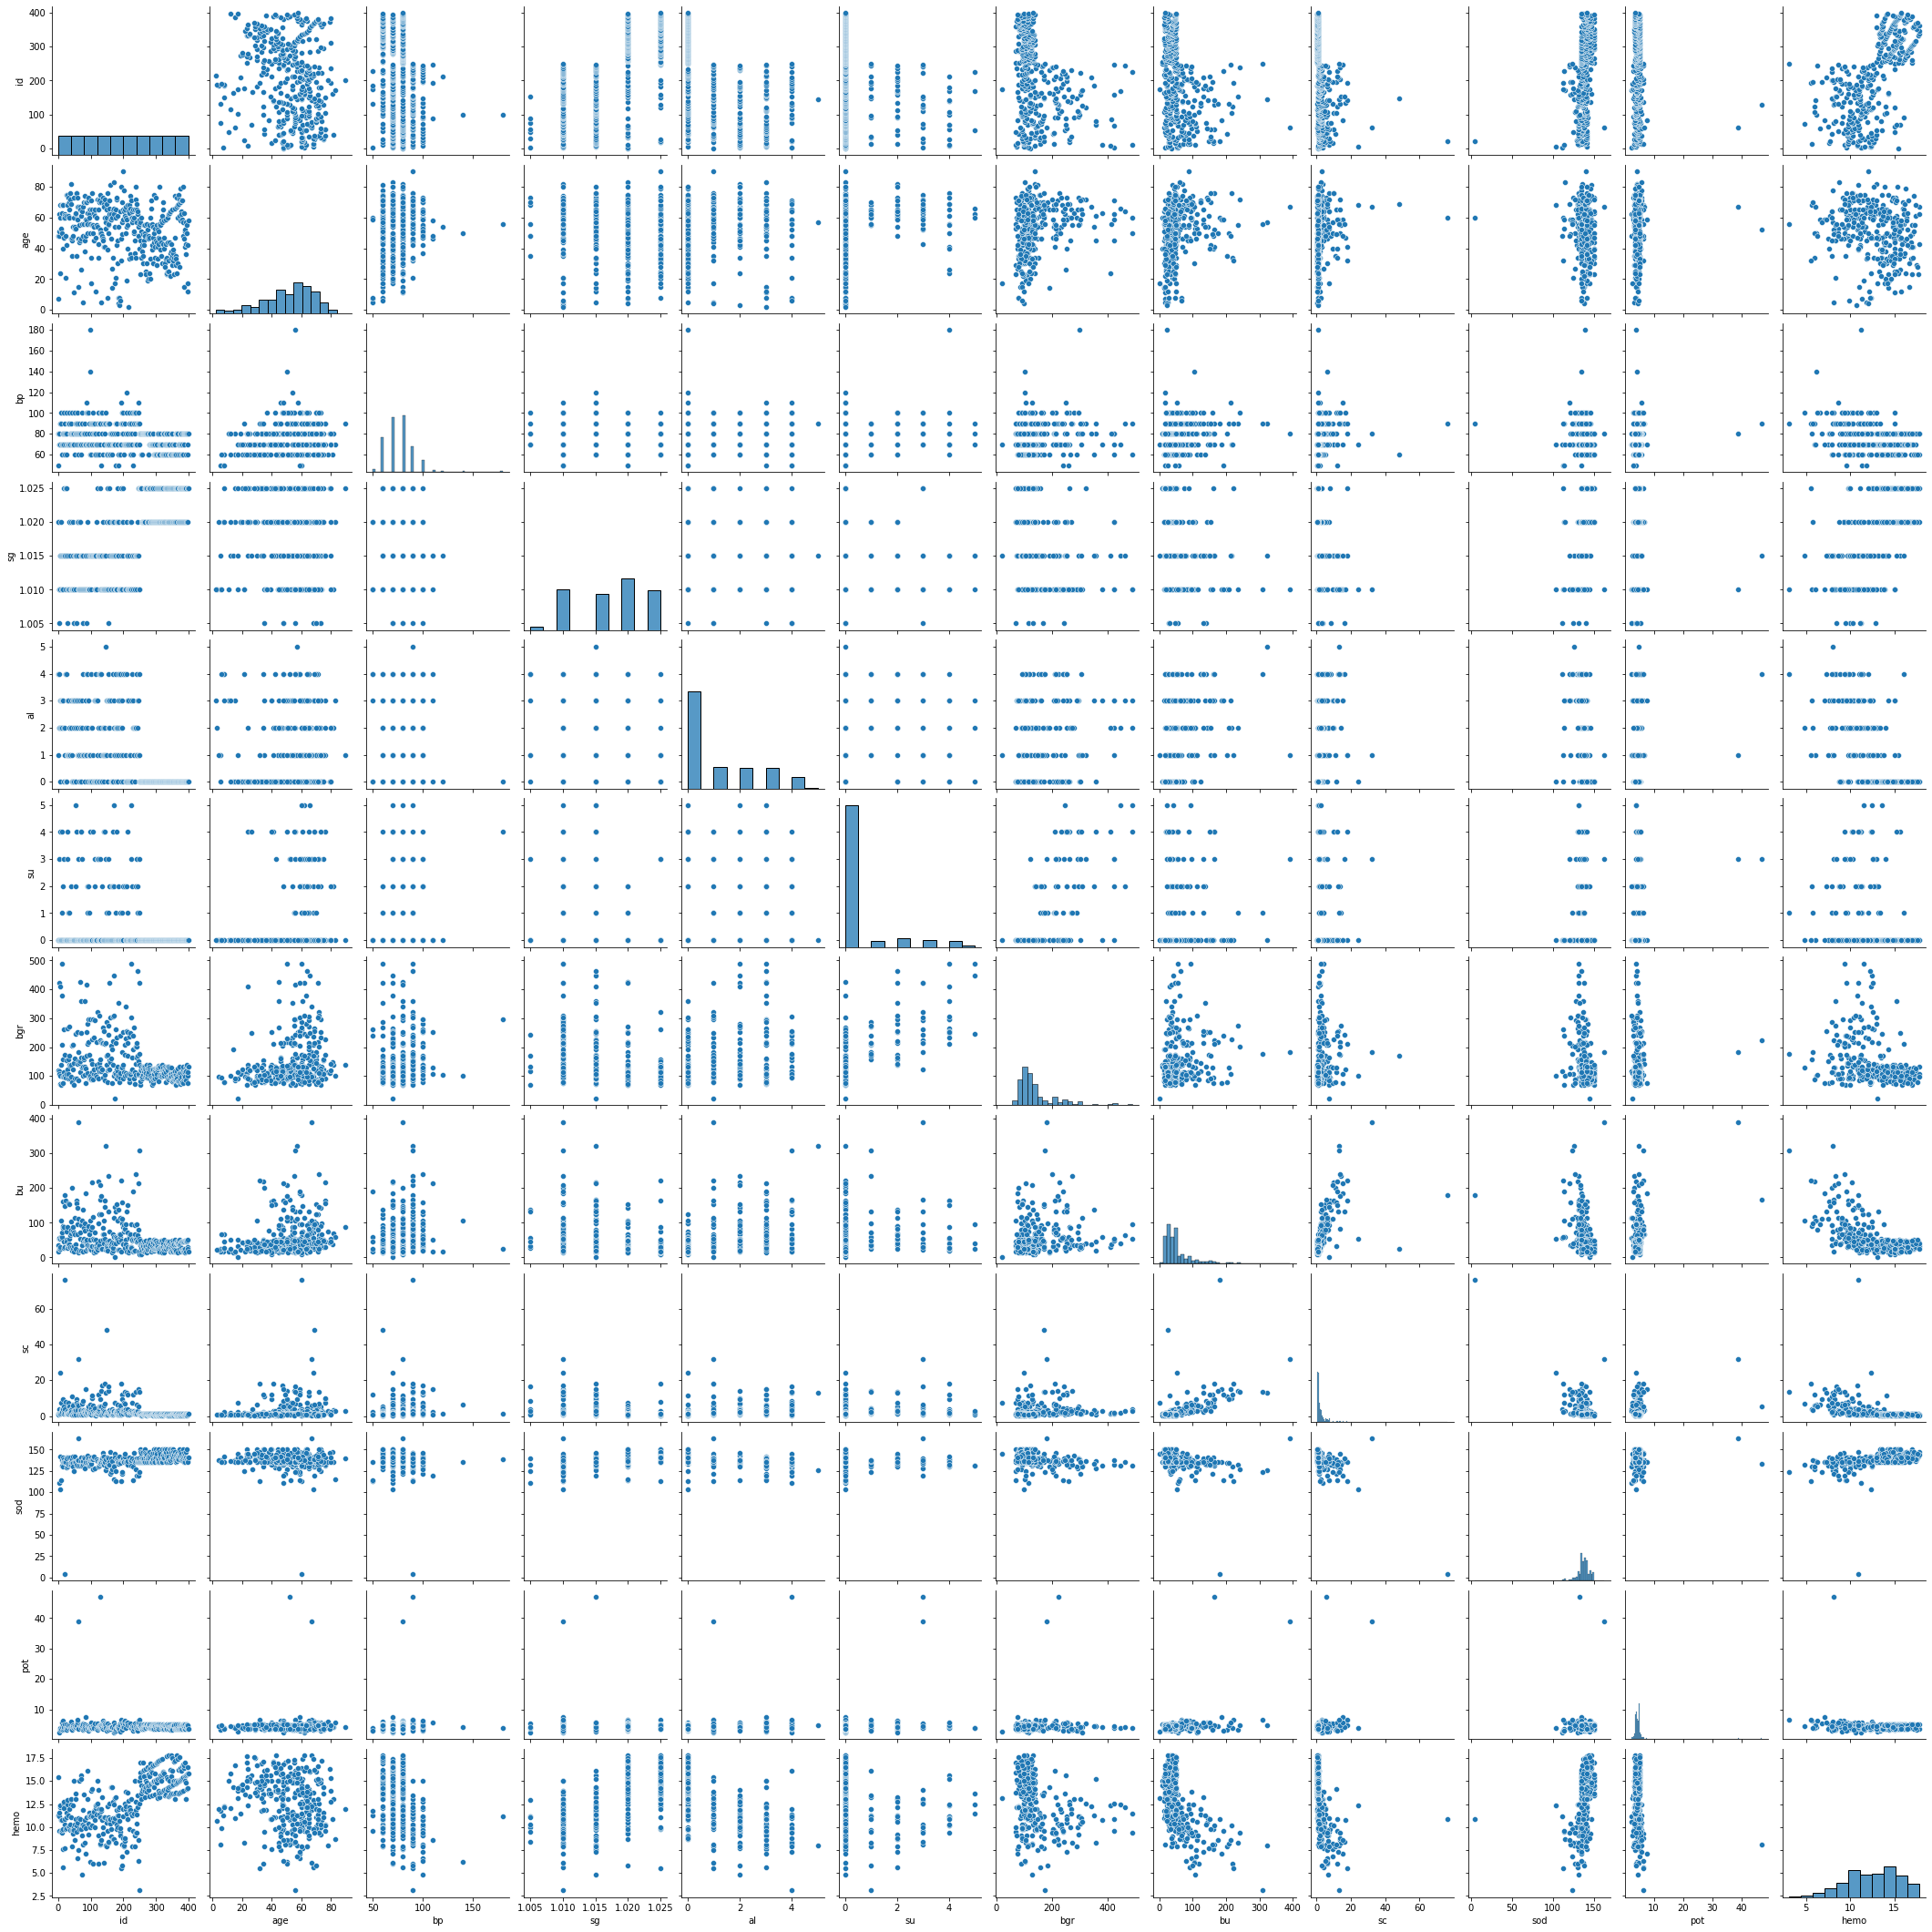

In [3]:
sns.pairplot(df);

In [4]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
cat_cols

['rbc',
 'pc',
 'pcc',
 'ba',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [5]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']
num_cols

['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

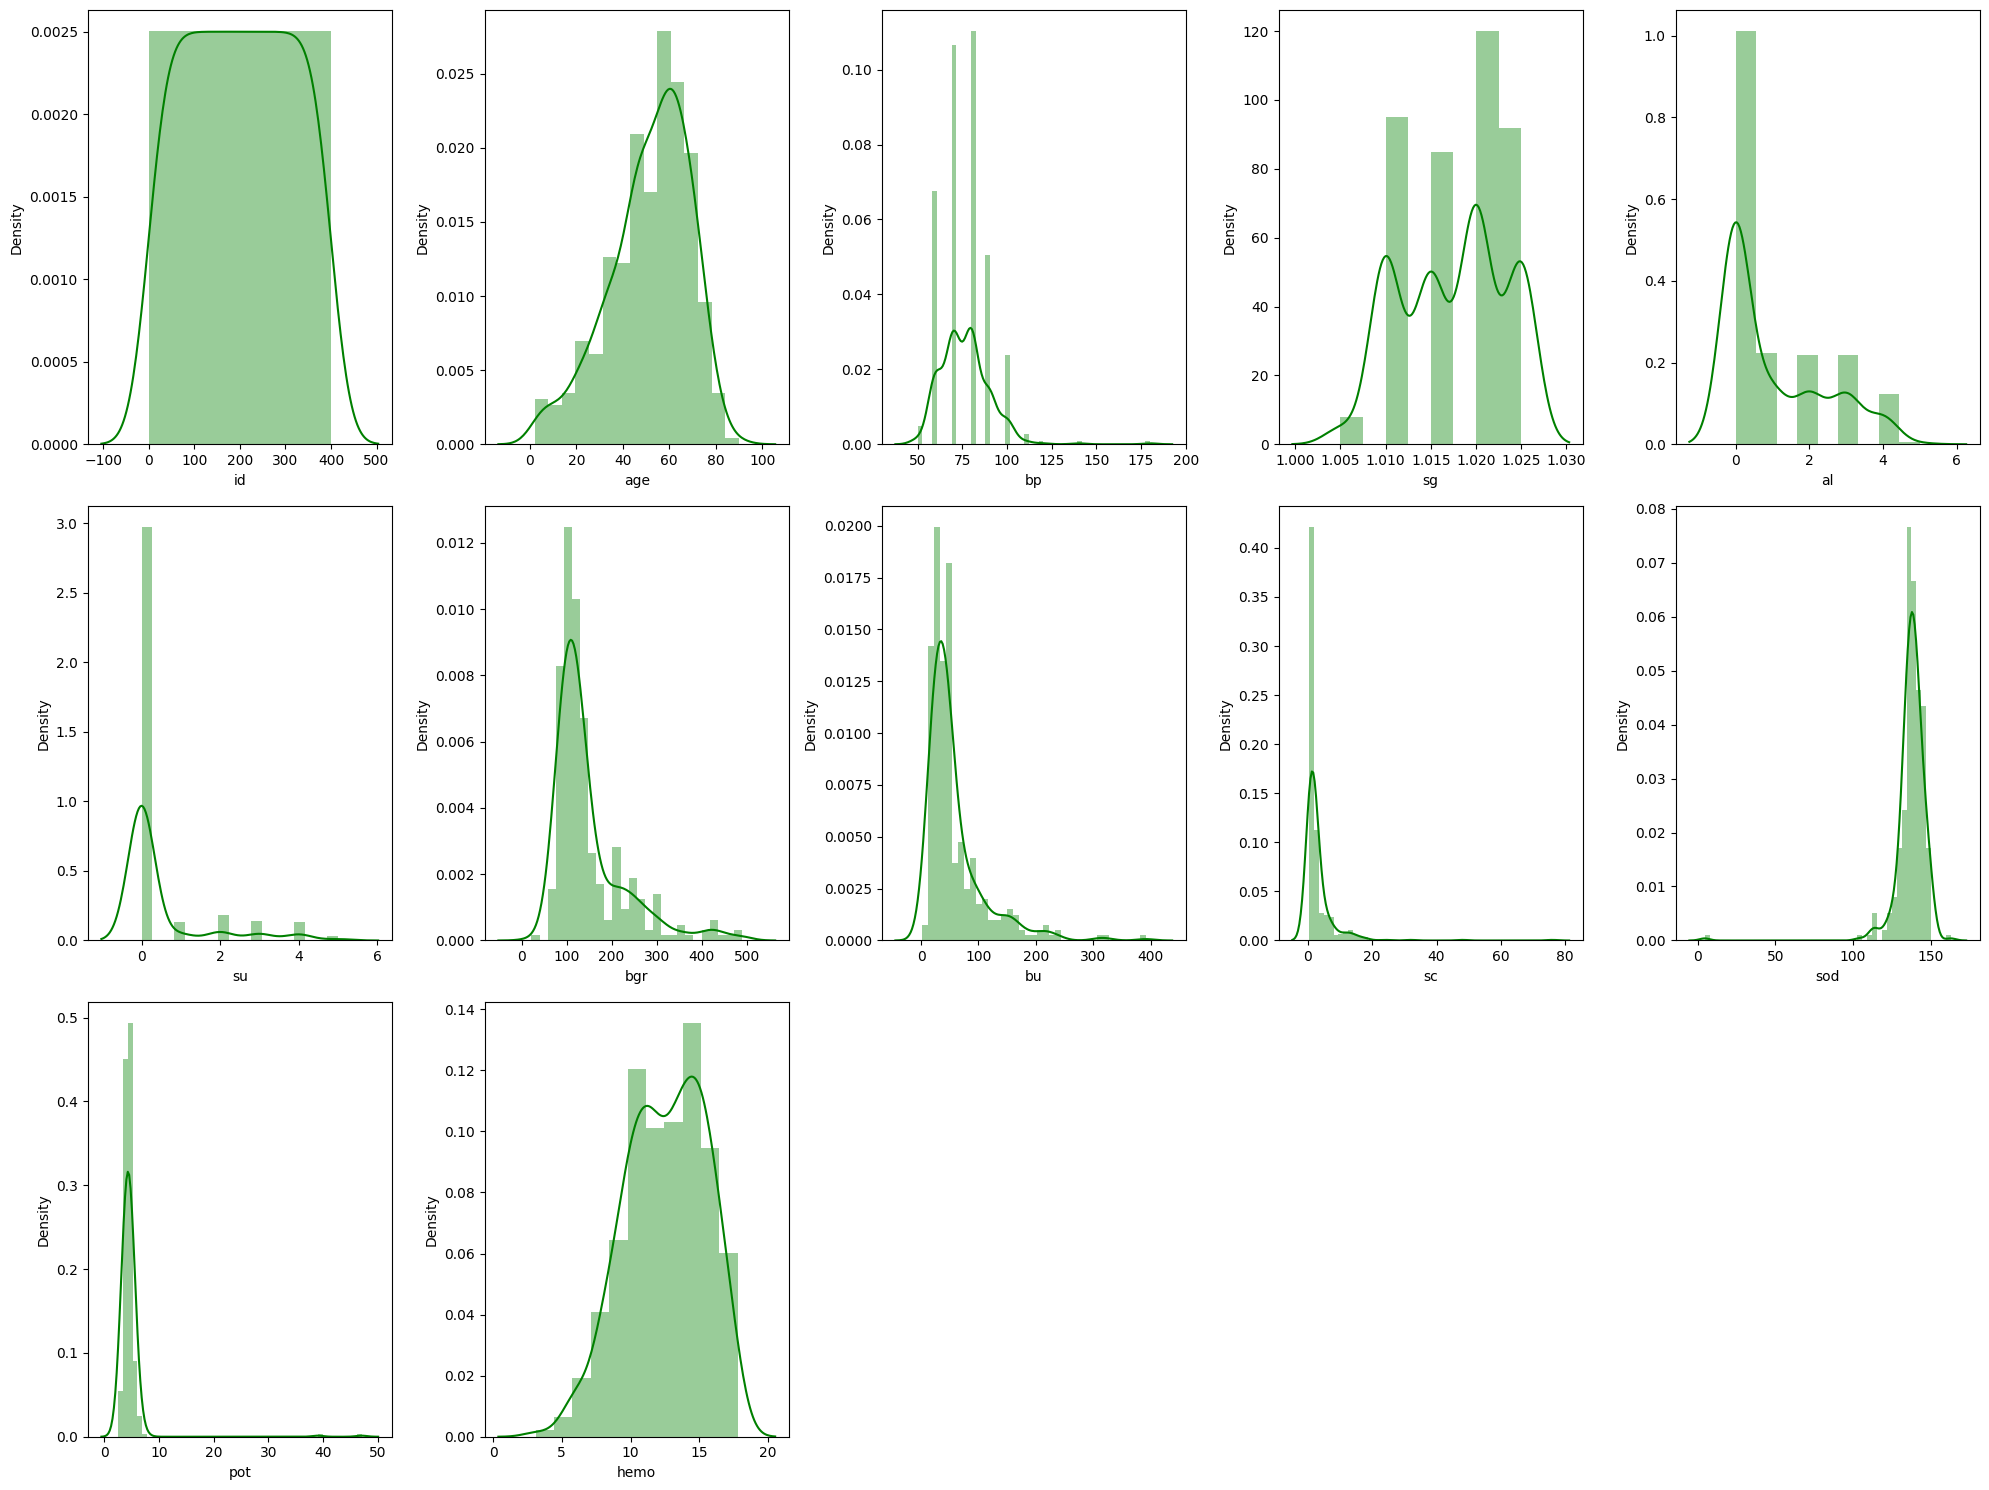

In [6]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(num_cols, 1):
    plt.subplot(3, 5, i)
    sns.distplot(df[column], color='green')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

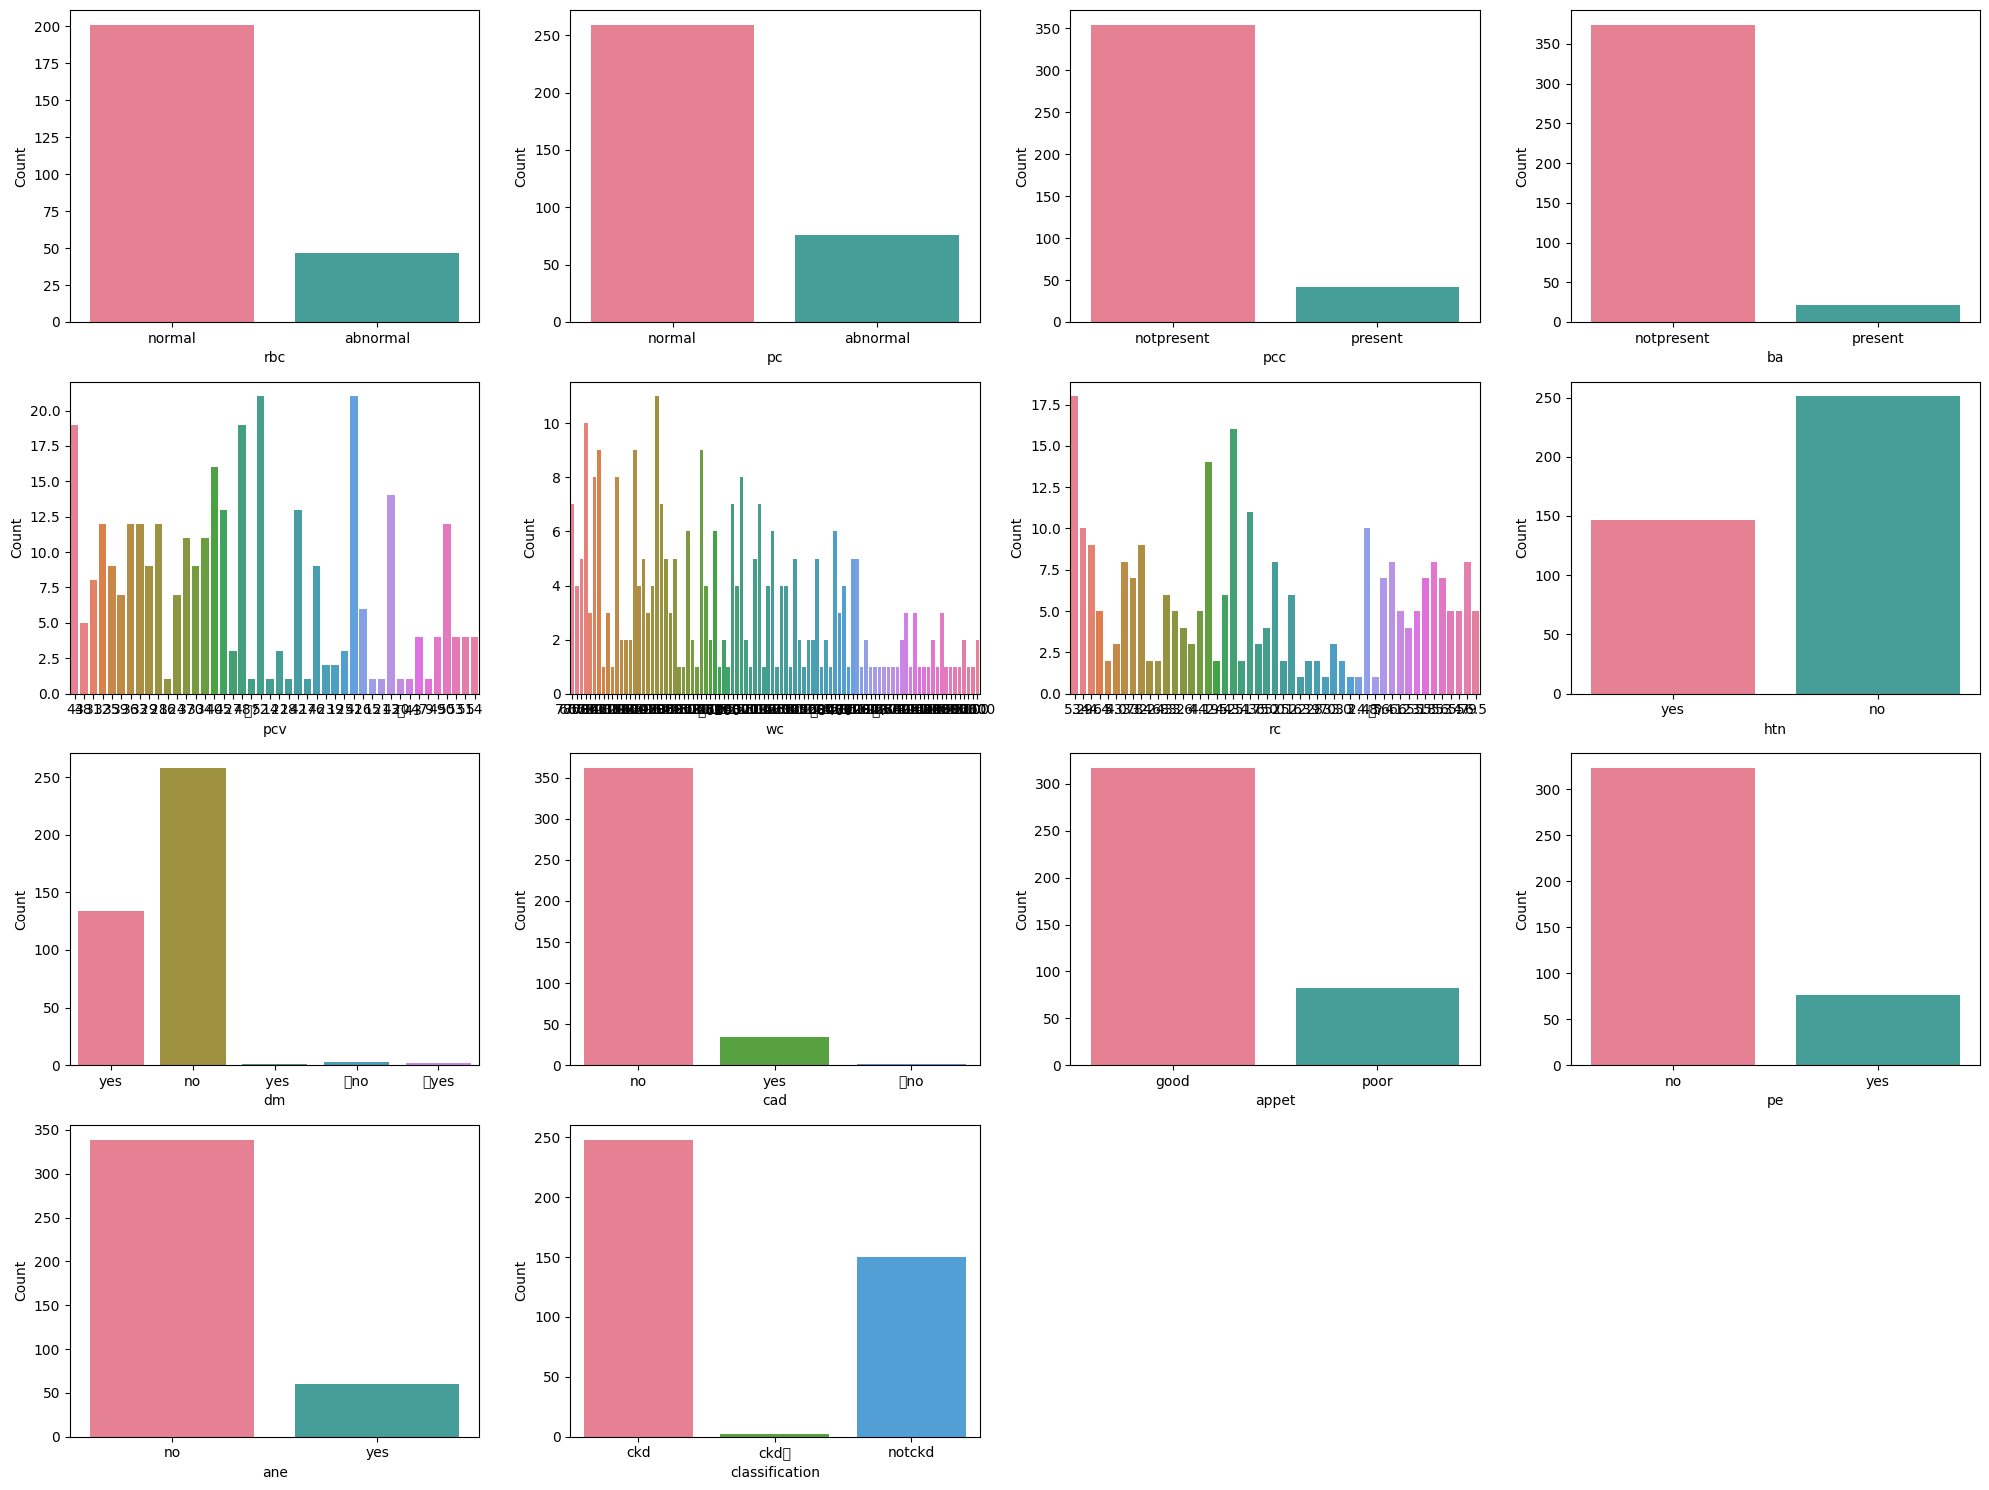

In [7]:
import math
plt.figure(figsize=(20, 15))
n_cols = 4
n_rows = math.ceil(len(cat_cols) / n_cols)

for i, column in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)  # Now using dynamic number of rows
    sns.countplot(data=df, x=column, palette='husl')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

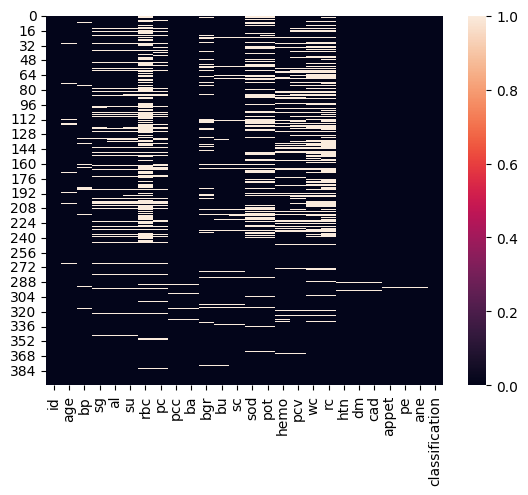

In [8]:
# Create a heatmap of missing values
sns.heatmap(df.isnull())
plt.show()

In [9]:
#check for duplicates
print("duplicate rows check:") 
# Check for duplicate rows
duplicate_rows = df.duplicated()
# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()
print("Number of duplicate rows:", num_duplicates)

duplicate rows check:
Number of duplicate rows: 0


In [10]:
#check for and print NaN values
nan_values = df.isnull().sum()
print(nan_values)

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


# Preprocessing

In [11]:
# Remove the "ID" column
df = df.drop("id", axis=1)

In [12]:
#Data Encoding
df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
df['classification'] = df['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
df.rename(columns={'classification':'class'},inplace=True)
df['pe'] = df['pe'].replace(to_replace='good',value=0)
df['appet'] = df['appet'].replace(to_replace='no',value=0)
df['cad'] = df['cad'].replace(to_replace='\tno',value=0)
df['dm'] = df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})

In [13]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1] 

In [14]:
# Replace '\t?' with NaN
X.replace('\t?', float('nan'), inplace=True)

In [15]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
imputer.fit(X)
X = imputer.transform(X)
print(X)

[[48.    80.     1.02  ...  1.     0.     0.   ]
 [ 7.    50.     1.02  ...  1.     0.     0.   ]
 [62.    80.     1.01  ...  0.     0.     1.   ]
 ...
 [12.    80.     1.02  ...  1.     0.     0.   ]
 [17.    60.     1.025 ...  1.     0.     0.   ]
 [58.    80.     1.025 ...  1.     0.     0.   ]]


In [16]:
#check NaN values
nan_value = np.isnan(X).sum()
print(nan_value)

0


In [17]:
df = pd.DataFrame(X)

# Check for and print NaN values
nan_values = df.isnull().sum()
print(nan_values)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
dtype: int64


In [18]:
print(X.shape)

(400, 24)


In [19]:
X

array([[48.   , 80.   ,  1.02 , ...,  1.   ,  0.   ,  0.   ],
       [ 7.   , 50.   ,  1.02 , ...,  1.   ,  0.   ,  0.   ],
       [62.   , 80.   ,  1.01 , ...,  0.   ,  0.   ,  1.   ],
       ...,
       [12.   , 80.   ,  1.02 , ...,  1.   ,  0.   ,  0.   ],
       [17.   , 60.   ,  1.025, ...,  1.   ,  0.   ,  0.   ],
       [58.   , 80.   ,  1.025, ...,  1.   ,  0.   ,  0.   ]])

In [20]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: class, Length: 400, dtype: float64

In [21]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

def scaling(X):
    # Perform robust scaling
    robust_scaler = RobustScaler()
    data_robust_scaled = robust_scaler.fit_transform(X)
    # Perform standard scaling
    standard_scaler = StandardScaler()
    data_standard_scaled = standard_scaler.fit_transform(data_robust_scaled)
    # Perform MinMax scaling
    minmax_scaler = MinMaxScaler()
    data_scaled = minmax_scaler.fit_transform(data_standard_scaled)
    return data_scaled
scaled_data = scaling(X)
print(scaled_data)


[[0.52272727 0.23076923 0.86061686 ... 1.         0.         0.        ]
 [0.05681818 0.         0.86061686 ... 1.         0.         0.        ]
 [0.68181818 0.23076923 0.58185057 ... 0.         0.         1.        ]
 ...
 [0.11363636 0.23076923 0.86061686 ... 1.         0.         0.        ]
 [0.17045455 0.07692308 1.         ... 1.         0.         0.        ]
 [0.63636364 0.23076923 1.         ... 1.         0.         0.        ]]


In [22]:
print(scaled_data.shape)

(400, 24)


In [23]:
column_names = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
                'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 
                'dm', 'cad', 'appet', 'pe', 'ane']
DF = pd.DataFrame(scaled_data, columns=column_names)
print(DF)

          age        bp        sg        al        su       rbc        pc  \
0    0.522727  0.230769  0.860617  0.199889  0.100115  0.145768  0.126237   
1    0.056818  0.000000  0.860617  0.695980  0.100115  0.195818  0.126237   
2    0.681818  0.230769  0.581851  0.365253  0.640046  0.045999  0.126237   
3    0.522727  0.153846  0.442467  0.695980  0.100115  0.045999  1.000000   
4    0.556818  0.230769  0.581851  0.365253  0.100115  0.045999  0.126237   
..        ...       ...       ...       ...       ...       ...       ...   
395  0.602273  0.230769  0.860617  0.034525  0.100115  0.045999  0.126237   
396  0.454545  0.153846  1.000000  0.034525  0.100115  0.045999  0.126237   
397  0.113636  0.230769  0.860617  0.034525  0.100115  0.045999  0.126237   
398  0.170455  0.076923  1.000000  0.034525  0.100115  0.045999  0.126237   
399  0.636364  0.230769  1.000000  0.034525  0.100115  0.045999  0.126237   

          pcc        ba       bgr  ...      hemo       pcv        wc  \
0  

In [24]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif
from sklearn.datasets import make_classification
selector = SelectKBest(score_func=mutual_info_classif, k=10)
selector.fit(scaled_data, y)
selected_features = list(DF.columns[selector.get_support(indices=True)])
print(selected_features)

['sg', 'al', 'rbc', 'sc', 'sod', 'hemo', 'pcv', 'rc', 'htn', 'dm']


In [25]:
selected_data = DF[selected_features]
# Print selected data
print("Selected features data:")
print(selected_data)

Selected features data:
           sg        al       rbc        sc       sod      hemo       pcv  \
0    0.860617  0.199889  0.145768  0.014954  0.850772  0.836735  0.777778   
1    0.860617  0.695980  0.195818  0.009686  0.806841  0.557823  0.644444   
2    0.581851  0.365253  0.045999  0.022855  0.810856  0.442177  0.488889   
3    0.442467  0.695980  0.045999  0.049193  0.671924  0.551020  0.511111   
4    0.581851  0.365253  0.045999  0.017587  0.833400  0.578231  0.577778   
..        ...       ...       ...       ...       ...       ...       ...   
395  0.860617  0.034525  0.045999  0.005735  0.917981  0.857143  0.844444   
396  1.000000  0.034525  0.045999  0.014954  0.861199  0.911565  1.000000   
397  0.860617  0.034525  0.045999  0.007052  0.835962  0.863946  0.888889   
398  1.000000  0.034525  0.045999  0.012320  0.823344  0.755102  0.933333   
399  1.000000  0.034525  0.045999  0.013637  0.861199  0.863946  0.977778   

           rc  htn   dm  
0    0.525424  1.0  1.0  

In [26]:
print(selected_data.shape)

(400, 10)


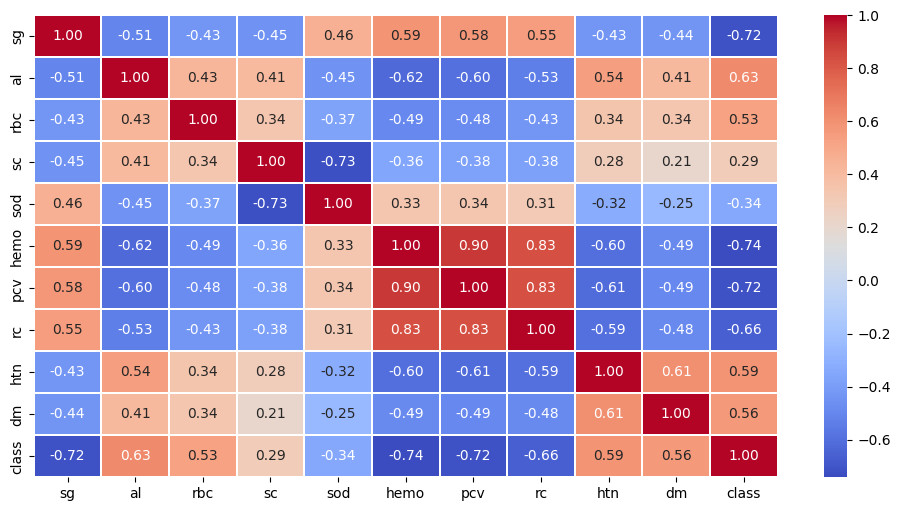

In [27]:
dat = pd.concat([selected_data, y], axis=1)
correlation_matrix = dat.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.2)
plt.show()

In [28]:
def perform(y_true, y_pred):
    print("Precision : ", precision_score(y_true, y_pred))
    print("Recall : ", recall_score(y_true, y_pred))
    print("Accuracy : ", accuracy_score(y_true, y_pred))
    print("F1 Score : ", f1_score(y_true, y_pred))
    print("ROC-AUC Score : ", roc_auc_score(y_true, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\n")

In [29]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(selected_data, y, test_size=0.3, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

# Naive Bayes

In [31]:
gauss_nb = GaussianNB()

# Fit the model on training data
gauss_nb.fit(X_train, y_train)

# Make predictions on both training and test data
y_pred_train_nb = gauss_nb.predict(X_train)
y_pred_test_nb = gauss_nb.predict(X_test)

In [32]:
# Evaluate performance on the training data
print("Training Data Evaluation:")
perform(y_train, y_pred_train_nb)

Training Data Evaluation:
Precision :  0.9885057471264368
Recall :  0.9885057471264368
Accuracy :  0.9857142857142858
F1 Score :  0.9885057471264368
ROC-AUC Score :  0.9848189112990674

Confusion Matrix:
 [[104   2]
 [  2 172]]




In [33]:
print(classification_report(y_train, y_pred_train_nb))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       106
         1.0       0.99      0.99      0.99       174

    accuracy                           0.99       280
   macro avg       0.98      0.98      0.98       280
weighted avg       0.99      0.99      0.99       280



In [34]:
# Evaluate performance on the test data
print("Test Data Evaluation:")
perform(y_test, y_pred_test_nb)

Test Data Evaluation:
Precision :  0.9743589743589743
Recall :  1.0
Accuracy :  0.9833333333333333
F1 Score :  0.9870129870129869
ROC-AUC Score :  0.9772727272727273

Confusion Matrix:
 [[42  2]
 [ 0 76]]




In [35]:
print(classification_report(y_test, y_pred_test_nb))

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98        44
         1.0       0.97      1.00      0.99        76

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [36]:
# Perform 5-fold cross-validation and compute multiple metrics for each model
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
nb_scores = cross_validate(gauss_nb, X_test, y_test, cv=5, scoring=scoring)

# Compute average of each metric
average_scores = {metric: scores.mean() for metric, scores in nb_scores.items() if 'test_' in metric}
print("Average scores of testing data for Naive Bayes:")
for metric, average_score in average_scores.items():
    print(f"{metric.replace('test_', '').capitalize()}: {average_score}")

Average scores of testing data for Naive Bayes:
Precision: 0.9749019607843138
Recall: 0.9866666666666667
Accuracy: 0.975
F1: 0.9806060606060607
Roc_auc: 0.9756481481481482


In [37]:
# Perform 5-fold cross-validation and compute multiple metrics for each model
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
nb_scores = cross_validate(gauss_nb, X_train, y_train, cv=5, scoring=scoring)

# Compute average of each metric
average_scores = {metric: scores.mean() for metric, scores in nb_scores.items() if 'test_' in metric}
print("Average scores of traning data for Naive Bayes:")
for metric, average_score in average_scores.items():
    print(f"{metric.replace('test_', '').capitalize()}: {average_score}")

Average scores of traning data for Naive Bayes:
Precision: 0.9888888888888889
Recall: 0.9941176470588236
Accuracy: 0.9892857142857142
F1: 0.9913811225562329
Roc_auc: 0.9902040816326532


# Decision Tree

In [38]:
param_grid_decision_tree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

decision_tree = DecisionTreeClassifier()

random_search = RandomizedSearchCV(decision_tree, param_grid_decision_tree, cv=5, n_iter=10)

random_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params_dt = random_search.best_params_
best_model_dt = random_search.best_estimator_

# Fit the model on training data
best_model_dt.fit(X_train, y_train)

# Print the best parameters and best model
print("Best Parameters:")
print(best_params_dt)
print("Best Model:")
print(best_model_dt)

# Make predictions on both training and test data
y_pred_train_dt = best_model_dt.predict(X_train)
y_pred_test_dt = best_model_dt.predict(X_test)

Best Parameters:
{'splitter': 'best', 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'entropy'}
Best Model:
DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=5)


In [39]:
# Evaluate performance on the training data
print("Training Data Evaluation:")
perform(y_train, y_pred_train_dt)

Training Data Evaluation:
Precision :  1.0
Recall :  0.9942528735632183
Accuracy :  0.9964285714285714
F1 Score :  0.9971181556195965
ROC-AUC Score :  0.9971264367816092

Confusion Matrix:
 [[106   0]
 [  1 173]]




In [40]:
print(classification_report(y_train, y_pred_train_dt))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       106
         1.0       1.00      0.99      1.00       174

    accuracy                           1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280



In [41]:
# Evaluate performance on the test data
print("Test Data Evaluation:")
perform(y_test, y_pred_test_dt)

Test Data Evaluation:
Precision :  0.987012987012987
Recall :  1.0
Accuracy :  0.9916666666666667
F1 Score :  0.9934640522875817
ROC-AUC Score :  0.9886363636363636

Confusion Matrix:
 [[43  1]
 [ 0 76]]




In [42]:
print(classification_report(y_test, y_pred_test_dt))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        44
         1.0       0.99      1.00      0.99        76

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [43]:
# Perform 5-fold cross-validation and compute multiple metrics for each model
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
dt_scores = cross_validate(best_model_dt, X_test, y_test, cv=5, scoring=scoring)

# Compute average of each metric
average_scores = {metric: scores.mean() for metric, scores in dt_scores.items() if 'test_' in metric}
print("Average scores of testing data for Decision Tree:")
for metric, average_score in average_scores.items():
    print(f"{metric.replace('test_', '').capitalize()}: {average_score}")

Average scores of testing data for Decision Tree:
Precision: 0.9639705882352942
Recall: 0.9741666666666667
Accuracy: 0.9583333333333334
F1: 0.9684700171908182
Roc_auc: 0.9509722222222223


In [44]:
# Perform 5-fold cross-validation and compute multiple metrics for each model
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
dt_scores = cross_validate(best_model_dt, X_train, y_train, cv=5, scoring=scoring)

# Compute average of each metric
average_scores = {metric: scores.mean() for metric, scores in dt_scores.items() if 'test_' in metric}
print("Average scores of traning data for Decision Tree:")
for metric, average_score in average_scores.items():
    print(f"{metric.replace('test_', '').capitalize()}: {average_score}")

Average scores of traning data for Decision Tree:
Precision: 1.0
Recall: 0.9709243697478993
Accuracy: 0.9821428571428571
F1: 0.9849721293199554
Roc_auc: 0.9912605042016807


# Logistic Regression

In [45]:
param_grid_logreg = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
}

logreg = LogisticRegression()

random_search = RandomizedSearchCV(logreg, param_grid_logreg, cv=5, n_iter=10)

random_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params_lr = random_search.best_params_
best_model_lr = random_search.best_estimator_

# Fit the model on training data
best_model_lr.fit(X_train, y_train)

# Print the best parameters and best model
print("Best Parameters:")
print(best_params_lr)
print("Best Model:")
print(best_model_lr)

# Make predictions on both training and test data
y_pred_train_lr = best_model_lr.predict(X_train)
y_pred_test_lr = best_model_lr.predict(X_test)

Best Parameters:
{'solver': 'liblinear', 'penalty': 'l1', 'C': 100}
Best Model:
LogisticRegression(C=100, penalty='l1', solver='liblinear')


In [46]:
# Evaluate performance on the training data
print("Training Data Evaluation:")
perform(y_train, y_pred_train_lr)

Training Data Evaluation:
Precision :  1.0
Recall :  1.0
Accuracy :  1.0
F1 Score :  1.0
ROC-AUC Score :  1.0

Confusion Matrix:
 [[106   0]
 [  0 174]]




In [47]:
print(classification_report(y_train, y_pred_train_lr))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       106
         1.0       1.00      1.00      1.00       174

    accuracy                           1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280



In [48]:
# Evaluate performance on the test data
print("Test Data Evaluation:")
perform(y_test, y_pred_test_lr)

Test Data Evaluation:
Precision :  1.0
Recall :  0.9868421052631579
Accuracy :  0.9916666666666667
F1 Score :  0.9933774834437086
ROC-AUC Score :  0.993421052631579

Confusion Matrix:
 [[44  0]
 [ 1 75]]




In [49]:
print(classification_report(y_test, y_pred_test_lr))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        44
         1.0       1.00      0.99      0.99        76

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [50]:
# Perform 5-fold cross-validation and compute multiple metrics for each model
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
lr_scores = cross_validate(best_model_lr, X_test, y_test, cv=5, scoring=scoring)

# Compute average of each metric
average_scores = {metric: scores.mean() for metric, scores in lr_scores.items() if 'test_' in metric}
print("Average scores of testing data for Logistic Regression:")
for metric, average_score in average_scores.items():
    print(f"{metric.replace('test_', '').capitalize()}: {average_score}")

Average scores of testing data for Logistic Regression:
Precision: 1.0
Recall: 0.9733333333333334
Accuracy: 0.9833333333333334
F1: 0.9862068965517242
Roc_auc: 1.0


In [51]:
# Perform 5-fold cross-validation and compute multiple metrics for each model
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
lr_scores = cross_validate(best_model_lr, X_train, y_train, cv=5, scoring=scoring)

# Compute average of each metric
average_scores = {metric: scores.mean() for metric, scores in lr_scores.items() if 'test_' in metric}
print("Average scores of traning data for Logistic Regression:")
for metric, average_score in average_scores.items():
    print(f"{metric.replace('test_', '').capitalize()}: {average_score}")

Average scores of traning data for Logistic Regression:
Precision: 1.0
Recall: 0.9884033613445379
Accuracy: 0.9928571428571429
F1: 0.9941163746484966
Roc_auc: 1.0


# K Neighbors Classifier

In [52]:

# Define the parameter grid for grid search
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'leaf_size': [20, 30, 40],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
# Create an instance of the KNeighborsClassifier
knn = KNeighborsClassifier()

# Perform grid search to find the optimal parameters
grid_search = RandomizedSearchCV(knn, param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params_knn = grid_search.best_params_
best_model_knn = grid_search.best_estimator_

# Print the best parameters and best model
print("Best Parameters:")
print(best_params_knn)
print("\nBest Model:")
print(best_model_knn)


Best Parameters:
{'weights': 'uniform', 'p': 2, 'n_neighbors': 5, 'metric': 'minkowski', 'leaf_size': 30, 'algorithm': 'brute'}

Best Model:
KNeighborsClassifier(algorithm='brute')


In [53]:
# Fit the model on training data
best_model_knn.fit(X_train, y_train)

# Make predictions on both training and test data
y_pred_train_knn = best_model_knn.predict(X_train)
y_pred_test_knn = best_model_knn.predict(X_test)

In [54]:
# Evaluate performance on the training data
print("Training Data Evaluation:")
perform(y_train, y_pred_train_knn)

Training Data Evaluation:
Precision :  1.0
Recall :  0.9885057471264368
Accuracy :  0.9928571428571429
F1 Score :  0.9942196531791908
ROC-AUC Score :  0.9942528735632183

Confusion Matrix:
 [[106   0]
 [  2 172]]




In [55]:
print(classification_report(y_train, y_pred_train_knn))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       106
         1.0       1.00      0.99      0.99       174

    accuracy                           0.99       280
   macro avg       0.99      0.99      0.99       280
weighted avg       0.99      0.99      0.99       280



In [56]:
# Evaluate performance on the test data
print("Test Data Evaluation:")
perform(y_test, y_pred_test_knn)

Test Data Evaluation:
Precision :  1.0
Recall :  0.9868421052631579
Accuracy :  0.9916666666666667
F1 Score :  0.9933774834437086
ROC-AUC Score :  0.993421052631579

Confusion Matrix:
 [[44  0]
 [ 1 75]]




In [57]:
print(classification_report(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        44
         1.0       1.00      0.99      0.99        76

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [58]:
# Perform 5-fold cross-validation and compute multiple metrics for each model
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
knn_scores = cross_validate(best_model_knn, X_test, y_test, cv=5, scoring=scoring)

# Compute average of each metric
average_scores = {metric: scores.mean() for metric, scores in knn_scores.items() if 'test_' in metric}
print("Average scores of testing data for K-Nearest Neighbors:")
for metric, average_score in average_scores.items():
    print(f"{metric.replace('test_', '').capitalize()}: {average_score}")

Average scores of testing data for K-Nearest Neighbors:
Precision: 1.0
Recall: 0.9733333333333334
Accuracy: 0.9833333333333334
F1: 0.9862068965517242
Roc_auc: 1.0


In [59]:
# Perform 5-fold cross-validation and compute multiple metrics for each model
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
knn_scores = cross_validate(best_model_knn, X_train, y_train, cv=5, scoring=scoring)

# Compute average of each metric
average_scores = {metric: scores.mean() for metric, scores in knn_scores.items() if 'test_' in metric}
print("Average scores of traning data for K-Nearest Neighbors:")
for metric, average_score in average_scores.items():
    print(f"{metric.replace('test_', '').capitalize()}: {average_score}")

Average scores of traning data for K-Nearest Neighbors:
Precision: 1.0
Recall: 0.9885714285714287
Accuracy: 0.9928571428571429
F1: 0.9942028985507246
Roc_auc: 1.0


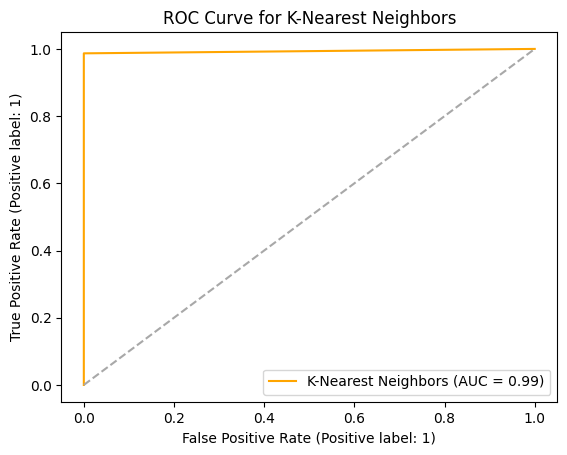

In [60]:
fig, ax = plt.subplots()
plt.title("ROC Curve for K-Nearest Neighbors")
RocCurveDisplay.from_predictions(y_test, y_pred_test_knn, ax=ax, name=f"K-Nearest Neighbors", color="orange")
plt.plot([0,1], [0,1], color="#A8A8A8", linestyle="--")

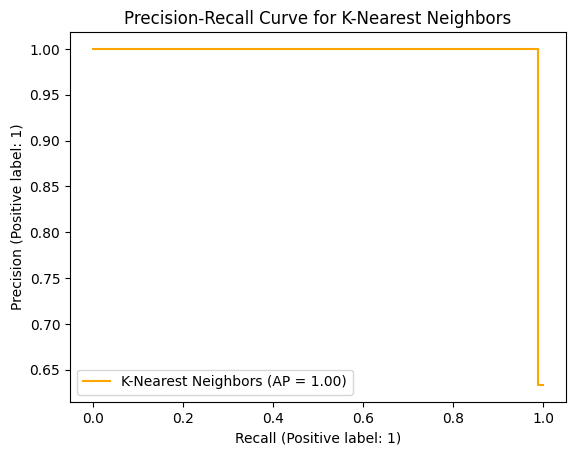

In [61]:
fig, ax = plt.subplots()
plt.title("Precision-Recall Curve for K-Nearest Neighbors")
PrecisionRecallDisplay.from_predictions(y_test, y_pred_test_knn, ax=ax, name=f"K-Nearest Neighbors", color="orange")

In [62]:
feature_columns = ['Specific gravity', 'Albumin', 'Red blood cells', 'Serum creatinine', 'Sodium', 'Hemoglobin', 'Packed cell volume', 'Red blood cell count', 'Hypertension', 'Diabetes mellitus']
#categorical features
categorical_features = [feature_columns.index('Hypertension'), feature_columns.index('Diabetes mellitus')]
class_names = ["Kidney Disease", "Normal"]

# LIME

In [63]:
from lime.lime_tabular import LimeTabularExplainer
explainer_lime = LimeTabularExplainer(X_train.values, 
                                 feature_names=feature_columns, 
                                 class_names=class_names,
                                 categorical_features=categorical_features, 
                                 mode='classification')

In [64]:
# instance for explanation
instance_index = 21
instance = X_test.iloc[instance_index]

# Generate and display the explanation
explanation_knn = explainer_lime.explain_instance(instance.values, best_model_knn.predict_proba, num_features=len(feature_columns))
explanation_knn.show_in_notebook()

# SHapley Additive exPlanations

  0%|          | 0/120 [00:00<?, ?it/s]

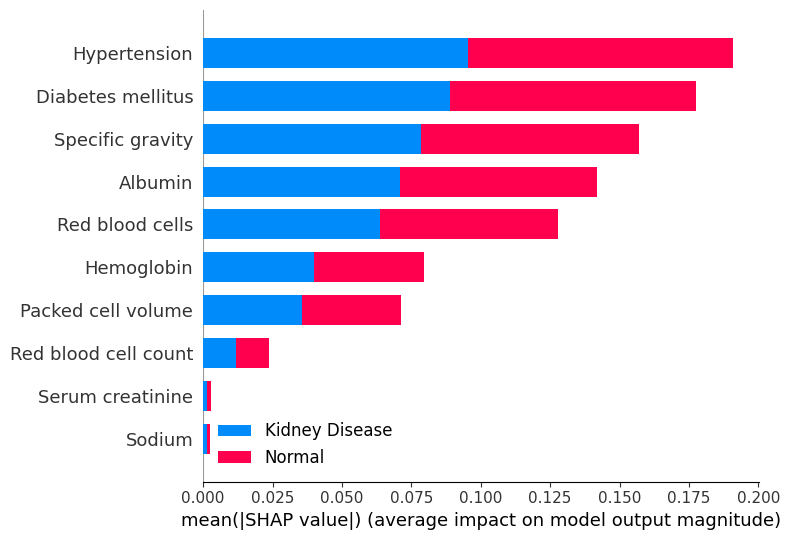

In [65]:
import shap
data = shap.sample(X_train, 100)
explainer_knn = shap.KernelExplainer(best_model_knn.predict_proba, data)
shap_values = explainer_knn.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=feature_columns, class_names=class_names)

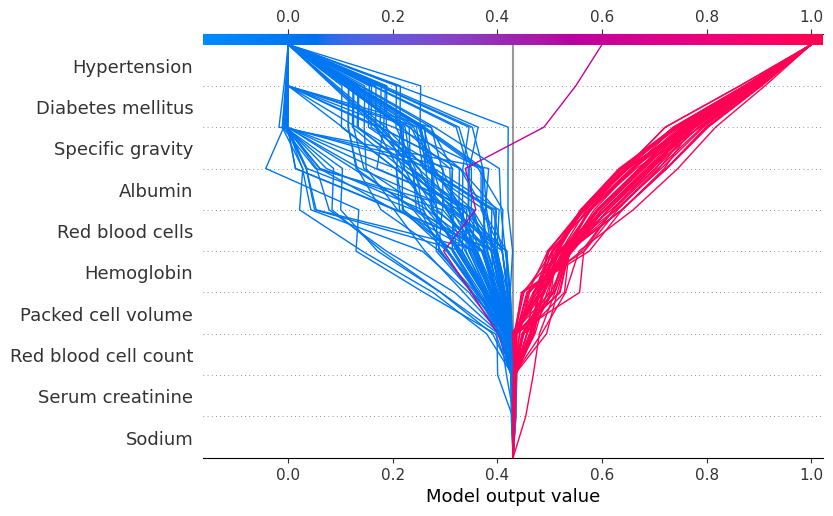

In [66]:
shap.decision_plot(explainer_knn.expected_value[0], shap_values[0], X_test, feature_names=feature_columns)
